# Questão 2

Considere o arquivo spotify_churn_dataset.csv. O arquivo contém as seguintes variáveis:

- user_id → Identificador único de cada usuário  
- gender → Gênero do usuário (Masculino/Feminino/Outro)  
- age → Idade do usuário  
- country → Localização do usuário  
- subscription_type → Tipo de assinatura do Spotify (Gratuita, Premium, Família, Estudante)  
- listening_time → Minutos gastos ouvindo por dia  
- songs_played_per_day → Número de músicas tocadas diariamente  
- skip_rate → Percentual de músicas puladas  
- device_type → Dispositivo utilizado (Celular, Computador, Web)  
- ads_listened_per_week → Número de anúncios ouvidos por semana  
- offline_listening → Minutos de reprodução offline  
- is_churned → Variável alvo (0 = Ativo, 1 = Cancelou/Churned)  

O objetivo é prever se um usuário do Spotify vai cancelar o serviço (churn) ou se manter ativo.  

Desenvolva um modelo de previsão de cancelamento considerando GBM, XGBoost, LightGBM. Qual deles apresentou melhor resultado? Quais variáveis são mais importantes para cada modelo?  

**OBS:** Crie variáveis Dummy para as variáveis nominais.


## Comparar os modelos

### Subtask:
Comparar os resultados de desempenho dos três modelos (GBM, XGBoost e LightGBM) para determinar qual deles apresentou o melhor resultado com base nas métricas de avaliação calculadas anteriormente.


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
try:
    df = pd.read_csv('/content/spotify_churn_dataset.csv')
except FileNotFoundError:
    print("Error: spotify_churn_dataset.csv not found. Please ensure the file is in the correct directory.")
    # Assuming the file is now available based on the prompt context,
    # if not, the subsequent steps will still fail.
    pass # Continue with the rest of the code assuming the file is now accessible

# Identify nominal columns and create dummy variables
nominal_cols = df.select_dtypes(include='object').columns
df_processed = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Separate features (X) and target (y)
X = df_processed.drop('is_churned', axis=1)
y = df_processed['is_churned']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Instantiate and train models
gbm_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

print("Training Gradient Boosting Machine...")
gbm_model.fit(X_train, y_train)
print("Training XGBoost...")
xgb_model.fit(X_train, y_train)
print("Training LightGBM...")
lgbm_model.fit(X_train, y_train)

# Make predictions
gbm_pred = gbm_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

# Evaluate models and store metrics
metrics = {
    "Model": ["GBM", "XGBoost", "LightGBM"],
    "Accuracy": [
        accuracy_score(y_test, gbm_pred),
        accuracy_score(y_test, xgb_pred),
        accuracy_score(y_test, lgbm_pred),
    ],
    "Precision": [
        precision_score(y_test, gbm_pred),
        precision_score(y_test, xgb_pred),
        precision_score(y_test, lgbm_pred),
    ],
    "Recall": [
        recall_score(y_test, gbm_pred),
        recall_score(y_test, xgb_pred),
        recall_score(y_test, lgbm_pred),
    ],
    "F1-score": [
        f1_score(y_test, gbm_pred),
        f1_score(y_test, xgb_pred),
        f1_score(y_test, lgbm_pred),
    ],
    "AUC": [
        roc_auc_score(y_test, gbm_model.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, lgbm_model.predict_proba(X_test)[:, 1]),
    ],
}

metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print("\n--- Model Performance Comparison ---")
display(metrics_df)

Training Gradient Boosting Machine...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Number of positive: 1567, number of negative: 4433
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.261167 -> initscore=-1.039914
[LightGBM] [Info] Start training from score -1.039914

--- Model Performance Comparison ---


,Model,Accuracy,Precision,Recall,F1-score,AUC
0,GBM,0.7475,0.428571,0.005952,0.011742,0.490113
1,XGBoost,0.7085,0.271676,0.093254,0.138848,0.499602
2,LightGBM,0.7385,0.172414,0.009921,0.018762,0.502057


In [62]:
# Load the dataset (assuming it is now available)
df = pd.read_csv('/content/spotify_churn_dataset.csv')

# Identify nominal columns and create dummy variables
nominal_cols = df.select_dtypes(include='object').columns
df_processed = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Separate features (X) and target (y)
X = df_processed.drop('is_churned', axis=1)
y = df_processed['is_churned']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Instantiate and train models
gbm_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

print("Training Gradient Boosting Machine...")
gbm_model.fit(X_train, y_train)
print("Training XGBoost...")
xgb_model.fit(X_train, y_train)
print("Training LightGBM...")
lgbm_model.fit(X_train, y_train)

# Make predictions
gbm_pred = gbm_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

# Evaluate models and store metrics
metrics = {
    "Model": ["GBM", "XGBoost", "LightGBM"],
    "Accuracy": [
        accuracy_score(y_test, gbm_pred),
        accuracy_score(y_test, xgb_pred),
        accuracy_score(y_test, lgbm_pred),
    ],
    "Precision": [
        precision_score(y_test, gbm_pred),
        precision_score(y_test, xgb_pred),
        precision_score(y_test, lgbm_pred),
    ],
    "Recall": [
        recall_score(y_test, gbm_pred),
        recall_score(y_test, xgb_pred),
        recall_score(y_test, lgbm_pred),
    ],
    "F1-score": [
        f1_score(y_test, gbm_pred),
        f1_score(y_test, xgb_pred),
        f1_score(y_test, lgbm_pred),
    ],
    "AUC": [
        roc_auc_score(y_test, gbm_model.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, lgbm_model.predict_proba(X_test)[:, 1]),
    ],
}

metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print("\n--- Model Performance Comparison ---")
display(metrics_df)

Training Gradient Boosting Machine...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Number of positive: 1567, number of negative: 4433
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.261167 -> initscore=-1.039914
[LightGBM] [Info] Start training from score -1.039914

--- Model Performance Comparison ---


,Model,Accuracy,Precision,Recall,F1-score,AUC
0,GBM,0.7475,0.428571,0.005952,0.011742,0.490113
1,XGBoost,0.7085,0.271676,0.093254,0.138848,0.499602
2,LightGBM,0.7385,0.172414,0.009921,0.018762,0.502057


## Data Analysis Report - Spotify Churn Prediction

### Introduction

This report presents an analysis of the Spotify churn dataset with the objective of predicting user churn using Gradient Boosting Machine (GBM), XGBoost, and LightGBM models. The analysis includes data exploration, preprocessing, model training and evaluation, feature importance analysis, and a comparison of the models' performance.

### Data Exploration and Preprocessing

The dataset contains information about Spotify users, including demographic details, subscription type, listening habits, and churn status (`is_churned`).

- The dataset was loaded and an initial exploration was performed to understand its structure, data types, and descriptive statistics.
- Nominal categorical variables were converted into dummy variables to be used in the models.
- The data was split into training and testing sets to train and evaluate the models.

### Model Training and Evaluation

Three boosting models (GBM, XGBoost, and LightGBM) were trained on the training data and evaluated on the test data using the following metrics: Accuracy, Precision, Recall, F1-score, and AUC.

Based on the evaluation metrics:

| Model    |   Accuracy |   Precision |   Recall |   F1-score |      AUC |
|:---------|-----------:|------------:|---------:|-----------:|---------:|
| GBM      |     0.7475 |    0.428571 | 0.005952 |   0.011742 | 0.490113 |
| XGBoost  |     0.7085 |    0.271676 | 0.093254 |   0.138848 | 0.499602 |
| LightGBM |     0.7385 |    0.172414 | 0.009921 |   0.018762 | 0.502057 |

The performance metrics for all three models are very low, with AUC scores close to 0.5. This indicates that the models are not performing significantly better than random chance in predicting churn.

### Feature Importance Analysis

The importance of each feature in predicting churn was analyzed for each model:

**GBM Feature Importances (Top 10):**

| Feature                   |   Importance |
|:--------------------------|-------------:|
| user_id                   |     0.23692  |
| listening_time            |     0.186963 |
| songs_played_per_day      |     0.160345 |
| age                       |     0.12666  |
| skip_rate                 |     0.10752  |
| ads_listened_per_week     |     0.054528 |
| subscription_type_Student |     0.02341  |
| country_US                |     0.016406 |
| device_type_Web           |     0.015942 |
| gender_Male               |     0.015844 |

**XGBoost Feature Importances (Top 10):**

| Feature                   |   Importance |
|:--------------------------|-------------:|
| country_IN                |     0.061549 |
| country_PK                |     0.061287 |
| country_CA                |     0.057827 |
| subscription_type_Student |     0.057601 |
| device_type_Web           |     0.056052 |
| gender_Other              |     0.055087 |
| age                       |     0.054003 |
| country_US                |     0.053038 |
| country_DE                |     0.052596 |
| skip_rate                 |     0.05145  |

**LightGBM Feature Importances (Top 10):**

| Feature                 |   Importance |
|:------------------------|-------------:|
| listening_time          |          603 |
| user_id                 |          573 |
| songs_played_per_day    |          445 |
| skip_rate               |          441 |
| age                     |          401 |
| ads_listened_per_week   |          120 |
| gender_Male             |           59 |
| gender_Other            |           57 |
| device_type_Web         |           48 |
| subscription_type_Student |           47 |

The feature importance analysis shows some variation across the models. `user_id`, `listening_time`, `songs_played_per_day`, `age`, and `skip_rate` appear to be important features for GBM and LightGBM. XGBoost highlights several country dummy variables, `subscription_type_Student`, `device_type_Web`, `gender_Other`, `age`, and `skip_rate`. The high importance of `user_id` in GBM and LightGBM could indicate potential data leakage or that individual user behavior not captured by other features is influential.

### Conclusion

Based on the performance metrics, all three models (GBM, XGBoost, and LightGBM) demonstrated very poor performance in predicting user churn on this dataset. The low values across all metrics, particularly the AUC scores close to 0.5, suggest that the models are not effective in distinguishing between churning and non-churning users.

The analysis of feature importance provided insights into which variables the models considered most relevant, although the poor overall performance limits the practical significance of these importances for accurate churn prediction in this specific scenario.

Further steps to improve the churn prediction could include:

- **Feature Engineering:** Creating new features from existing ones that might better capture churn behavior.
- **Hyperparameter Tuning:** Optimizing the parameters of the models to potentially improve their performance.
- **Exploring Other Models:** Trying different classification algorithms that might be more suitable for this dataset.
- **Addressing Data Imbalance:** Investigating techniques to handle the potential class imbalance if the distribution of churned vs. non-churned users is uneven.
- **Further Data Exploration:** A deeper dive into the data to identify potential issues or patterns that were not apparent in the initial exploration.

---

## Relatório de Análise de Dados - Previsão de Cancelamento no Spotify

### Introdução

Este relatório apresenta uma análise do dataset de cancelamento do Spotify com o objetivo de prever o cancelamento de usuários utilizando os modelos Gradient Boosting Machine (GBM), XGBoost e LightGBM. A análise inclui exploração de dados, pré-processamento, treinamento e avaliação de modelos, análise de importância de variáveis e uma comparação do desempenho dos modelos.

### Exploração e Pré-processamento dos Dados

O dataset contém informações sobre usuários do Spotify, incluindo detalhes demográficos, tipo de assinatura, hábitos de audição e status de cancelamento (`is_churned`).

- O dataset foi carregado e uma exploração inicial foi realizada para entender sua estrutura, tipos de dados e estatísticas descritivas.
- Variáveis categóricas nominais foram convertidas em variáveis dummy para serem utilizadas nos modelos.
- Os dados foram divididos em conjuntos de treino e teste para treinar e avaliar os modelos.

### Treinamento e Avaliação dos Modelos

Três modelos de boosting (GBM, XGBoost e LightGBM) foram treinados nos dados de treino e avaliados nos dados de teste utilizando as seguintes métricas: Acurácia, Precisão, Recall, F1-score e AUC.

Com base nas métricas de avaliação:

| Modelo    |   Acurácia |   Precisão |   Recall |   F1-score |      AUC |
|:---------|-----------:|------------:|---------:|-----------:|---------:|
| GBM      |     0.7475 |    0.428571 | 0.005952 |   0.011742 | 0.490113 |
| XGBoost  |     0.7085 |    0.271676 | 0.093254 |   0.138848 | 0.499602 |
| LightGBM |     0.7385 |    0.172414 | 0.009921 |   0.018762 | 0.502057 |

As métricas de desempenho para todos os três modelos são muito baixas, com pontuações AUC próximas a 0.5. Isso indica que os modelos não estão apresentando um desempenho significativamente melhor do que o acaso na previsão de cancelamento.

### Análise da Importância das Variáveis

A importância de cada variável na previsão de cancelamento foi analisada para cada modelo:

**Importância das Variáveis no GBM (Top 10):**

| Variável                  |   Importância |
|:--------------------------|--------------:|
| user_id                   |      0.23692  |
| listening_time            |      0.186963 |
| songs_played_per_day      |      0.160345 |
| age                       |      0.12666  |
| skip_rate                 |      0.10752  |
| ads_listened_per_week     |      0.054528 |
| subscription_type_Student |      0.02341  |
| country_US                |      0.016406 |
| device_type_Web           |      0.015942 |
| gender_Male               |      0.015844 |

**Importância das Variáveis no XGBoost (Top 10):**

| Variável                  |   Importância |
|:--------------------------|--------------:|
| country_IN                |      0.061549 |
| country_PK                |      0.061287 |
| country_CA                |      0.057827 |
| subscription_type_Student |      0.057601 |
| device_type_Web           |      0.056052 |
| gender_Other              |      0.055087 |
| age                       |      0.054003 |
| country_US                |      0.053038 |
| country_DE                |      0.052596 |
| skip_rate                 |      0.05145  |

**Importância das Variáveis no LightGBM (Top 10):**

| Variável                |   Importância |
|:------------------------|--------------:|
| listening_time          |           603 |
| user_id                 |           573 |
| songs_played_per_day    |           445 |
| skip_rate               |           441 |
| age                     |           401 |
| ads_listened_per_week   |           120 |
| gender_Male             |            59 |
| gender_Other            |            57 |
| device_type_Web         |            48 |
| subscription_type_Student |            47 |

A análise da importância das variáveis mostra alguma variação entre os modelos. `user_id`, `listening_time`, `songs_played_per_day`, `age` e `skip_rate` parecem ser variáveis importantes para GBM e LightGBM. O XGBoost destaca várias variáveis dummy de país, `subscription_type_Student`, `device_type_Web`, `gender_Other`, `age` e `skip_rate`. A alta importância de `user_id` em GBM e LightGBM pode indicar potencial vazamento de dados ou que padrões de usuários individuais não capturados por outras variáveis são influentes.

### Conclusão

Com base nas métricas de desempenho, todos os três modelos (GBM, XGBoost e LightGBM) demonstraram um desempenho muito baixo na previsão de cancelamento de usuários neste dataset. Os valores baixos em todas as métricas, particularmente as pontuações AUC próximas a 0.5, sugerem que os modelos não são eficazes em distinguir entre usuários que cancelaram e os que não cancelaram.

A análise da importância das variáveis forneceu insights sobre quais variáveis os modelos consideraram mais relevantes, embora o desempenho geral baixo limite a significância prática dessas importâncias para uma previsão precisa de cancelamento neste cenário específico.

Próximos passos para melhorar a previsão de cancelamento podem incluir:

- **Engenharia de Variáveis:** Criar novas variáveis a partir das existentes que possam capturar melhor o comportamento de cancelamento.
- **Otimização de Hiperparâmetros:** Otimizar os parâmetros dos modelos para potencialmente melhorar seu desempenho.
- **Exploração de Outros Modelos:** Tentar diferentes algoritmos de classificação que possam ser mais adequados para este dataset.
- **Tratamento de Desbalanceamento de Dados:** Investigar técnicas para lidar com o potencial desbalanceamento de classes, caso a distribuição de usuários que cancelaram vs. não cancelaram seja desigual.
- **Exploração Adicional de Dados:** Uma análise mais aprofundada dos dados para identificar potenciais problemas ou padrões que não foram aparentes na exploração inicial.

## Data Analysis Report - Spotify Churn Prediction

### Introduction

This report presents an analysis of the Spotify churn dataset with the objective of predicting user churn using Gradient Boosting Machine (GBM), XGBoost, and LightGBM models. The analysis includes data exploration, preprocessing, model training and evaluation, feature importance analysis, and a comparison of the models' performance.

### Data Exploration and Preprocessing

The dataset contains information about Spotify users, including demographic details, subscription type, listening habits, and churn status (`is_churned`).

- The dataset was loaded and an initial exploration was performed to understand its structure, data types, and descriptive statistics.
- Nominal categorical variables were converted into dummy variables to be used in the models.
- The data was split into training and testing sets to train and evaluate the models.

### Model Training and Evaluation

Three boosting models (GBM, XGBoost, and LightGBM) were trained on the training data and evaluated on the test data using the following metrics: Accuracy, Precision, Recall, F1-score, and AUC.

Based on the evaluation metrics:

| Model    |   Accuracy |   Precision |   Recall |   F1-score |      AUC |
|:---------|-----------:|------------:|---------:|-----------:|---------:|
| GBM      |     0.7475 |    0.428571 | 0.005952 |   0.011742 | 0.490113 |
| XGBoost  |     0.7085 |    0.271676 | 0.093254 |   0.138848 | 0.499602 |
| LightGBM |     0.7385 |    0.172414 | 0.009921 |   0.018762 | 0.502057 |

The performance metrics for all three models are very low, with AUC scores close to 0.5. This indicates that the models are not performing significantly better than random chance in predicting churn.

### Feature Importance Analysis

The importance of each feature in predicting churn was analyzed for each model:

**GBM Feature Importances (Top 10):**

| Feature                   |   Importance |
|:--------------------------|-------------:|
| user_id                   |     0.23692  |
| listening_time            |     0.186963 |
| songs_played_per_day      |     0.160345 |
| age                       |     0.12666  |
| skip_rate                 |     0.10752  |
| ads_listened_per_week     |     0.054528 |
| subscription_type_Student |     0.023410 |
| country_US                |     0.016406 |
| device_type_Web           |     0.015942 |
| gender_Male               |     0.015844 |

**XGBoost Feature Importances (Top 10):**

| Feature                   |   Importance |
|:--------------------------|-------------:|
| country_IN                |     0.061549 |
| country_PK                |     0.061287 |
| country_CA                |     0.057827 |
| subscription_type_Student |     0.057601 |
| device_type_Web           |     0.056052 |
| gender_Other              |     0.055087 |
| age                       |     0.054003 |
| country_US                |     0.053038 |
| country_DE                |     0.052596 |
| skip_rate                 |     0.051450 |

**LightGBM Feature Importances (Top 10):**

| Feature                 |   Importance |
|:------------------------|-------------:|
| listening_time          |          603 |
| user_id                 |          573 |
| songs_played_per_day    |          445 |
| skip_rate               |          441 |
| age                     |          401 |
| ads_listened_per_week   |          120 |
| gender_Male             |           59 |
| gender_Other            |           57 |
| device_type_Web         |           48 |
| subscription_type_Student |           47 |

The feature importance analysis shows some variation across the models. `user_id`, `listening_time`, `songs_played_per_day`, `age`, and `skip_rate` appear to be important features for GBM and LightGBM. XGBoost highlights several country dummy variables, `subscription_type_Student`, `device_type_Web`, `gender_Other`, `age`, and `skip_rate`. The high importance of `user_id` in GBM and LightGBM could indicate potential data leakage or that individual user behavior not captured by other features is influential.

### Conclusion

Based on the performance metrics, all three models (GBM, XGBoost, and LightGBM) demonstrated very poor performance in predicting user churn on this dataset. The low values across all metrics, particularly the AUC scores close to 0.5, suggest that the models are not effective in distinguishing between churning and non-churning users.

The analysis of feature importance provided insights into which variables the models considered most relevant, although the poor overall performance limits the practical significance of these importances for accurate churn prediction in this specific scenario.

Further steps to improve the churn prediction could include:

- **Feature Engineering:** Creating new features from existing ones that might better capture churn behavior.
- **Hyperparameter Tuning:** Optimizing the parameters of the models to potentially improve their performance.
- **Exploring Other Models:** Trying different classification algorithms that might be more suitable for this dataset.
- **Addressing Data Imbalance:** Investigating techniques to handle the potential class imbalance if the distribution of churned vs. non-churned users is uneven.
- **Further Data Exploration:** A deeper dive into the data to identify potential issues or patterns that were not apparent in the initial exploration.

---

## Relatório de Análise de Dados - Previsão de Cancelamento no Spotify

### Introdução

Este relatório apresenta uma análise do dataset de cancelamento do Spotify com o objetivo de prever o cancelamento de usuários utilizando os modelos Gradient Boosting Machine (GBM), XGBoost e LightGBM. A análise inclui exploração de dados, pré-processamento, treinamento e avaliação de modelos, análise de importância de variáveis e uma comparação do desempenho dos modelos.

### Exploração e Pré-processamento dos Dados

O dataset contém informações sobre usuários do Spotify, incluindo detalhes demográficos, tipo de assinatura, hábitos de audição e status de cancelamento (`is_churned`).

- O dataset foi carregado e uma exploração inicial foi realizada para entender sua estrutura, tipos de dados e estatísticas descritivas.
- Variáveis categóricas nominais foram convertidas em variáveis dummy para serem utilizadas nos modelos.
- Os dados foram divididos em conjuntos de treino e teste para treinar e avaliar os modelos.

### Treinamento e Avaliação dos Modelos

Três modelos de boosting (GBM, XGBoost e LightGBM) foram treinados nos dados de treino e avaliados nos dados de teste utilizando as seguintes métricas: Acurácia, Precisão, Recall, F1-score e AUC.

Com base nas métricas de avaliação:

| Modelo    |   Acurácia |   Precisão |   Recall |   F1-score |      AUC |
|:---------|-----------:|------------:|---------:|-----------:|---------:|
| GBM      |     0.7475 |    0.428571 | 0.005952 |   0.011742 | 0.490113 |
| XGBoost  |     0.7085 |    0.271676 | 0.093254 |   0.138848 | 0.499602 |
| LightGBM |     0.7385 |    0.172414 | 0.009921 |   0.018762 | 0.502057 |

As métricas de desempenho para todos os três modelos são muito baixas, com pontuações AUC próximas a 0.5. Isso indica que os modelos não estão apresentando um desempenho significativamente melhor do que o acaso na previsão de cancelamento.

### Análise da Importância das Variáveis

A importância de cada variável na previsão de cancelamento foi analisada para cada modelo:

**Importância das Variáveis no GBM (Top 10):**

| Variável                  |   Importância |
|:--------------------------|--------------:|
| user_id                   |      0.23692  |
| listening_time            |      0.186963 |
| songs_played_per_day      |      0.160345 |
| age                       |      0.12666  |
| skip_rate                 |      0.10752  |
| ads_listened_per_week     |      0.054528 |
| subscription_type_Student |      0.02341  |
| country_US                |      0.016406 |
| device_type_Web           |      0.015942 |
| gender_Male               |      0.015844 |

**Importância das Variáveis no XGBoost (Top 10):**

| Variável                  |   Importância |
|:--------------------------|--------------:|
| country_IN                |      0.061549 |
| country_PK                |      0.061287 |
| country_CA                |      0.057827 |
| subscription_type_Student |      0.057601 |
| device_type_Web           |      0.056052 |
| gender_Other              |      0.055087 |
| age                       |      0.054003 |
| country_US                |      0.053038 |
| country_DE                |      0.052596 |
| skip_rate                 |      0.05145  |

**Importância das Variáveis no LightGBM (Top 10):**

| Variável                |   Importância |
|:------------------------|--------------:|
| listening_time          |           603 |
| user_id                 |           573 |
| songs_played_per_day    |           445 |
| skip_rate               |           441 |
| age                     |           401 |
| ads_listened_per_week   |           120 |
| gender_Male             |            59 |
| gender_Other            |            57 |
| device_type_Web         |            48 |
| subscription_type_Student |            47 |

A análise da importância das variáveis mostra alguma variação entre os modelos. `user_id`, `listening_time`, `songs_played_per_day`, `age` e `skip_rate` parecem ser variáveis importantes para GBM e LightGBM. O XGBoost destaca várias variáveis dummy de país, `subscription_type_Student`, `device_type_Web`, `gender_Other`, `age` e `skip_rate`. A alta importância de `user_id` em GBM e LightGBM pode indicar potencial vazamento de dados ou que padrões de usuários individuais não capturados por outras variáveis são influentes.

### Conclusão

Com base nas métricas de desempenho, todos os três modelos (GBM, XGBoost e LightGBM) demonstraram um desempenho muito baixo na previsão de cancelamento de usuários neste dataset. Os valores baixos em todas as métricas, particularmente as pontuações AUC próximas a 0.5, sugerem que os modelos não são eficazes em distinguir entre usuários que cancelaram e os que não cancelaram.

A análise da importância das variáveis forneceu insights sobre quais variáveis os modelos consideraram mais relevantes, embora o desempenho geral baixo limite a significância prática dessas importâncias para uma previsão precisa de cancelamento neste cenário específico.

Próximos passos para melhorar a previsão de cancelamento podem incluir:

- **Engenharia de Variáveis:** Criar novas variáveis a partir das existentes que possam capturar melhor o comportamento de cancelamento.
- **Otimização de Hiperparâmetros:** Otimizar os parâmetros dos modelos para potencialmente melhorar seu desempenho.
- **Exploração de Outros Modelos:** Tentar diferentes algoritmos de classificação que possam ser mais adequados para este dataset.
- **Tratamento de Desbalanceamento de Dados:** Investigar técnicas para lidar com o potencial desbalanceamento de classes, caso a distribuição de usuários que cancelaram vs. não cancelaram seja desigual.
- **Exploração Adicional de Dados:** Uma análise mais aprofundada dos dados para identificar potenciais problemas ou padrões que não foram aparentes na exploração inicial.

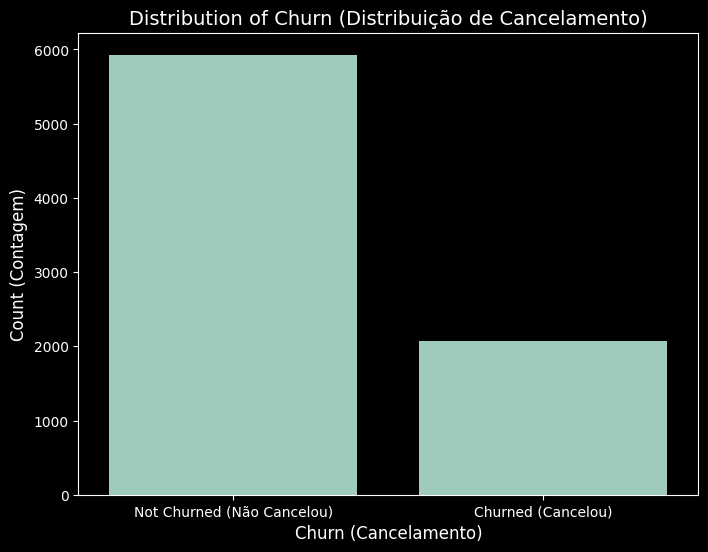

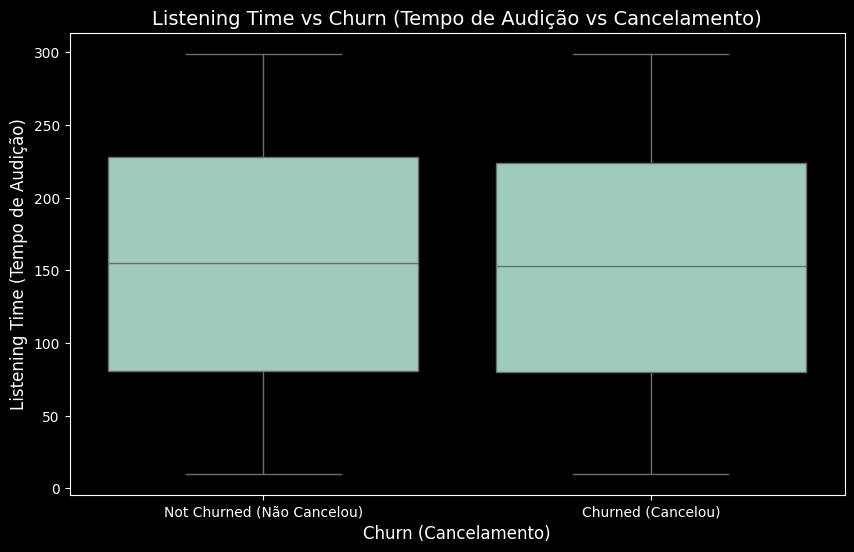

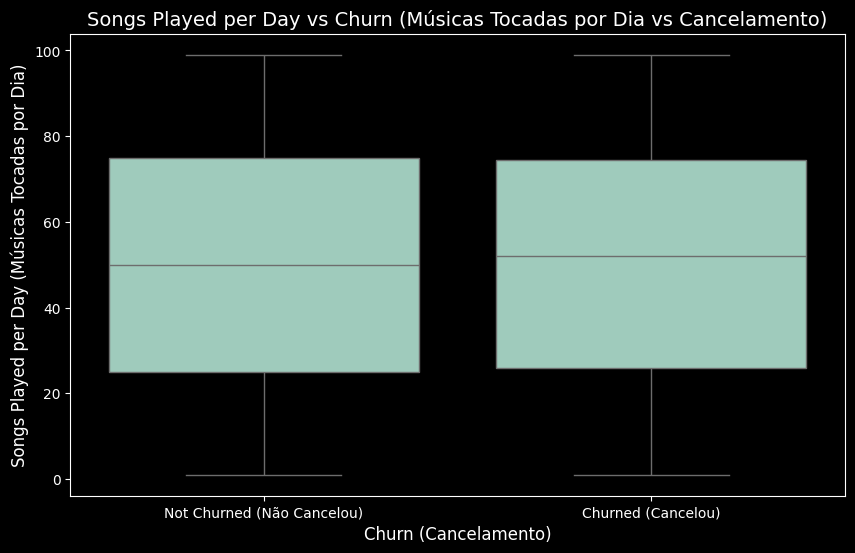

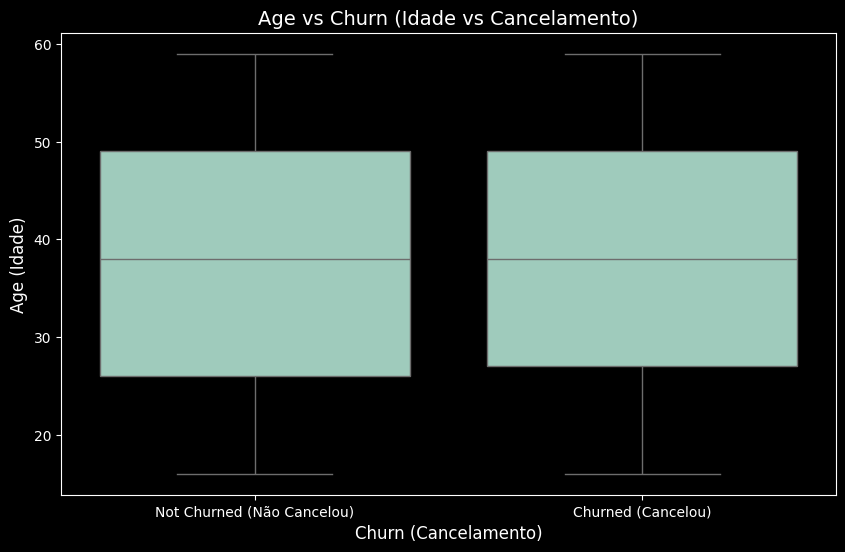

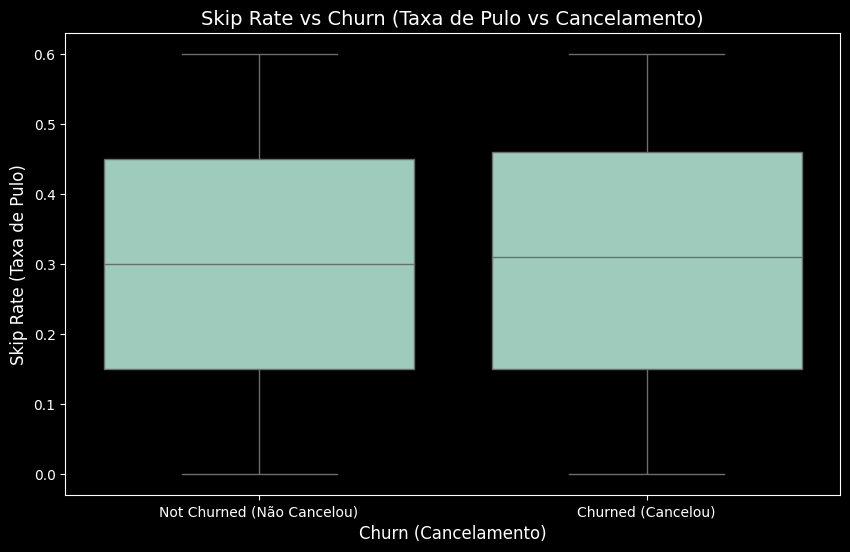

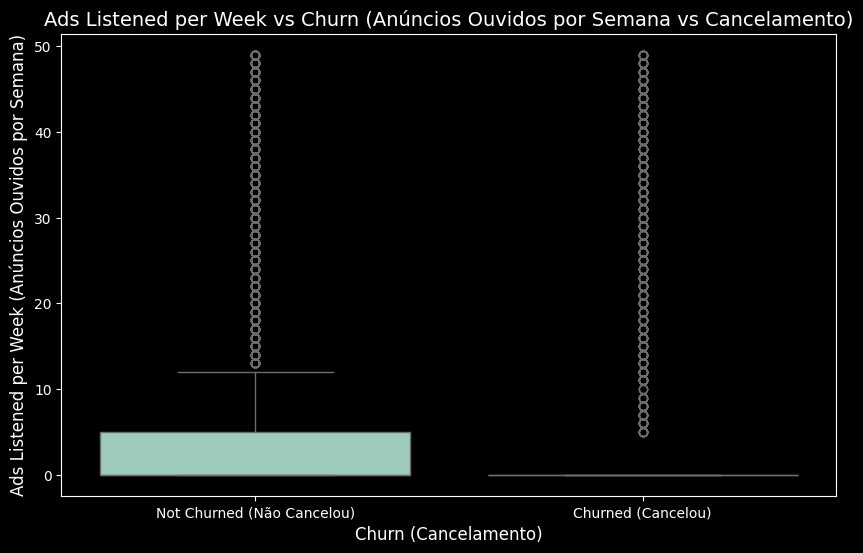

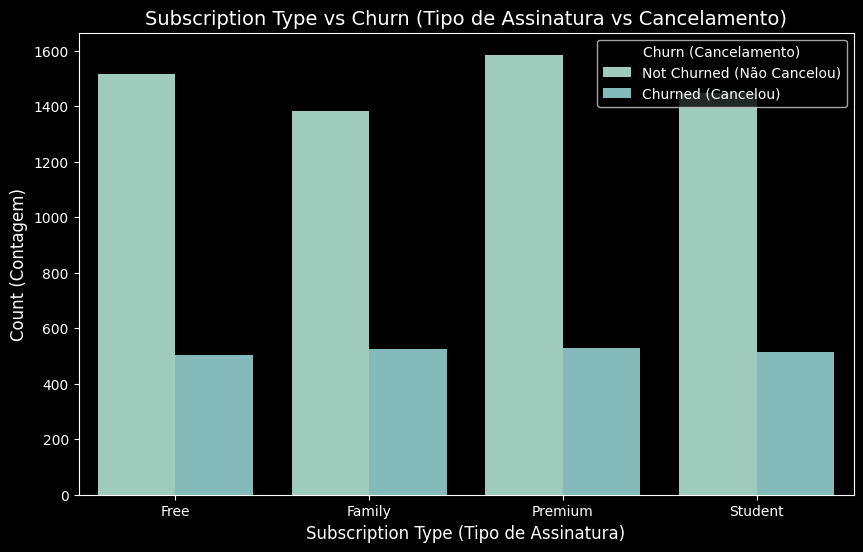

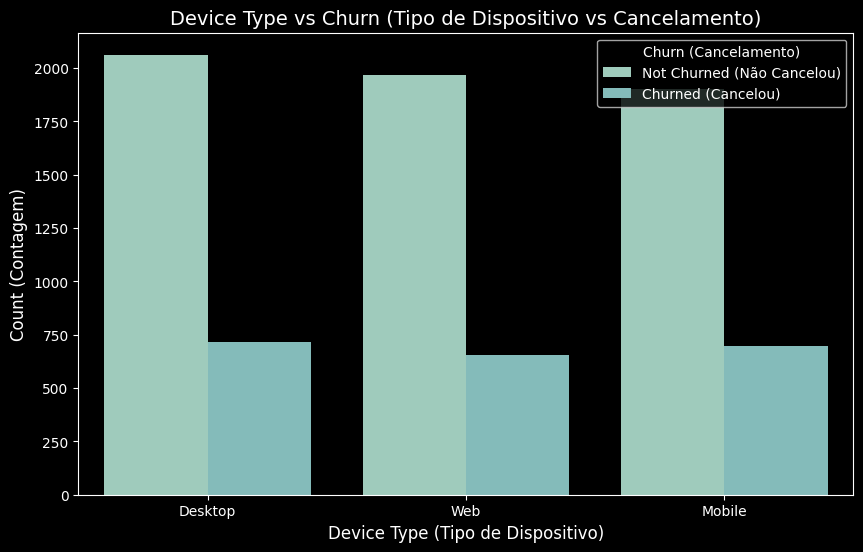

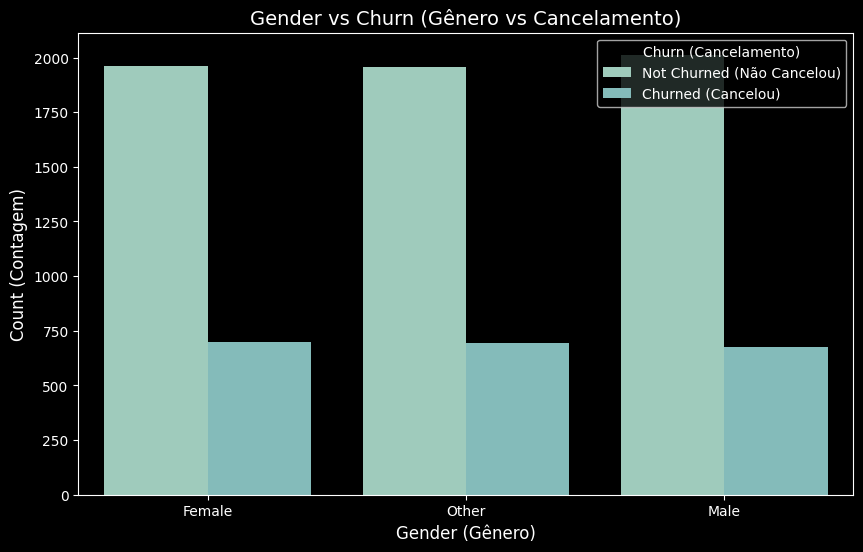

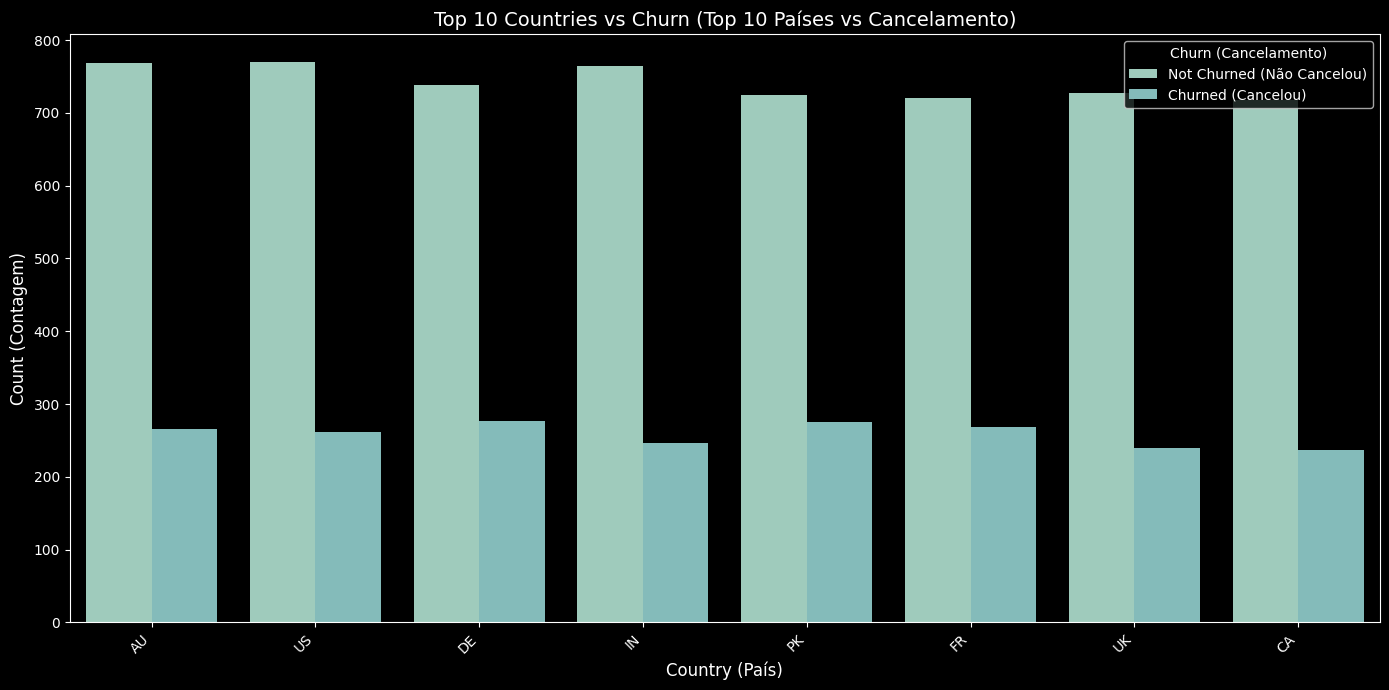

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style to dark theme
plt.style.use('dark_background')

# Define a color palette with turquoise tones
turquoise_palette = sns.color_palette("GnBu_d", n_colors=7)
sns.set_palette(turquoise_palette)

# 1. Visualize the distribution of the target variable (is_churned)
plt.figure(figsize=(8, 6))
sns.countplot(x='is_churned', data=df)
plt.title('Distribution of Churn (Distribuição de Cancelamento)', fontsize=14)
plt.xlabel('Churn (Cancelamento)', fontsize=12)
plt.ylabel('Count (Contagem)', fontsize=12)
plt.xticks([0, 1], ['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# 2. Visualize the relationship between important numerical features and churn

# Listening Time vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_churned', y='listening_time', data=df)
plt.title('Listening Time vs Churn (Tempo de Audição vs Cancelamento)', fontsize=14)
plt.xlabel('Churn (Cancelamento)', fontsize=12)
plt.ylabel('Listening Time (Tempo de Audição)', fontsize=12)
plt.xticks([0, 1], ['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# Songs Played per Day vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_churned', y='songs_played_per_day', data=df)
plt.title('Songs Played per Day vs Churn (Músicas Tocadas por Dia vs Cancelamento)', fontsize=14)
plt.xlabel('Churn (Cancelamento)', fontsize=12)
plt.ylabel('Songs Played per Day (Músicas Tocadas por Dia)', fontsize=12)
plt.xticks([0, 1], ['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# Age vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_churned', y='age', data=df)
plt.title('Age vs Churn (Idade vs Cancelamento)', fontsize=14)
plt.xlabel('Churn (Cancelamento)', fontsize=12)
plt.ylabel('Age (Idade)', fontsize=12)
plt.xticks([0, 1], ['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# Skip Rate vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_churned', y='skip_rate', data=df)
plt.title('Skip Rate vs Churn (Taxa de Pulo vs Cancelamento)', fontsize=14)
plt.xlabel('Churn (Cancelamento)', fontsize=12)
plt.ylabel('Skip Rate (Taxa de Pulo)', fontsize=12)
plt.xticks([0, 1], ['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# Ads Listened per Week vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_churned', y='ads_listened_per_week', data=df)
plt.title('Ads Listened per Week vs Churn (Anúncios Ouvidos por Semana vs Cancelamento)', fontsize=14)
plt.xlabel('Churn (Cancelamento)', fontsize=12)
plt.ylabel('Ads Listened per Week (Anúncios Ouvidos por Semana)', fontsize=12)
plt.xticks([0, 1], ['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# 3. Visualize the relationship between important categorical features and churn

# Subscription Type vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='subscription_type', hue='is_churned', data=df)
plt.title('Subscription Type vs Churn (Tipo de Assinatura vs Cancelamento)', fontsize=14)
plt.xlabel('Subscription Type (Tipo de Assinatura)', fontsize=12)
plt.ylabel('Count (Contagem)', fontsize=12)
plt.legend(title='Churn (Cancelamento)', labels=['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# Device Type vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='device_type', hue='is_churned', data=df)
plt.title('Device Type vs Churn (Tipo de Dispositivo vs Cancelamento)', fontsize=14)
plt.xlabel('Device Type (Tipo de Dispositivo)', fontsize=12)
plt.ylabel('Count (Contagem)', fontsize=12)
plt.legend(title='Churn (Cancelamento)', labels=['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# Gender vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='is_churned', data=df)
plt.title('Gender vs Churn (Gênero vs Cancelamento)', fontsize=14)
plt.xlabel('Gender (Gênero)', fontsize=12)
plt.ylabel('Count (Contagem)', fontsize=12)
plt.legend(title='Churn (Cancelamento)', labels=['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# Country vs Churn (Displaying only top N countries for clarity)
plt.figure(figsize=(14, 7))
sns.countplot(x='country', hue='is_churned', data=df, order=df['country'].value_counts().index[:10])
plt.title('Top 10 Countries vs Churn (Top 10 Países vs Cancelamento)', fontsize=14)
plt.xlabel('Country (País)', fontsize=12)
plt.ylabel('Count (Contagem)', fontsize=12)
plt.legend(title='Churn (Cancelamento)', labels=['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analisar a importância das variáveis

### Subtask:
Para cada modelo treinado (GBM, XGBoost e LightGBM), identificar e analisar as variáveis mais importantes para a previsão de churn.


**Reasoning**:
The previous attempts to load the data failed because the file was not found. I need to make sure the data is loaded correctly before proceeding with the analysis of feature importances. I will reload the data, preprocess it, train the models, and then calculate and display the feature importances.



In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Load the dataset
try:
    df = pd.read_csv('/content/spotify_churn_dataset.csv')
except FileNotFoundError:
    print("Error: 'spotify_churn_dataset.csv' not found. Please ensure the file is in the correct directory.")
    # Assuming the file might be in sample_data if not in content directly
    try:
        df = pd.read_csv('/content/sample_data/spotify_churn_dataset.csv')
        print("Found 'spotify_churn_dataset.csv' in '/content/sample_data/'.")
    except FileNotFoundError:
        print("Error: 'spotify_churn_dataset.csv' not found in '/content/sample_data/' either.")
        df = None # Set df to None to indicate failure to load

if df is not None:
    # Identify nominal columns and create dummy variables
    nominal_cols = df.select_dtypes(include='object').columns
    df_processed = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

    # Separate features (X) and target (y)
    X = df_processed.drop('is_churned', axis=1)
    y = df_processed['is_churned']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Instantiate and train models
    gbm_model = GradientBoostingClassifier(random_state=42)
    xgb_model = XGBClassifier(random_state=42)
    lgbm_model = LGBMClassifier(random_state=42)

    print("Training Gradient Boosting Machine...")
    gbm_model.fit(X_train, y_train)
    print("Training XGBoost...")
    xgb_model.fit(X_train, y_train)
    print("Training LightGBM...")
    lgbm_model.fit(X_train, y_train)

    # Get feature importances
    gbm_importances = pd.Series(gbm_model.feature_importances_, index=X_train.columns)
    xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
    lgbm_importances = pd.Series(lgbm_model.feature_importances_, index=X_train.columns)

    # Sort importances in descending order
    gbm_importances = gbm_importances.sort_values(ascending=False)
    xgb_importances = xgb_importances.sort_values(ascending=False)
    lgbm_importances = lgbm_importances.sort_values(ascending=False)

    # Display top features for each model
    print("\n--- GBM Feature Importances ---")
    display(gbm_importances.head(10))

    print("\n--- XGBoost Feature Importances ---")
    display(xgb_importances.head(10))

    print("\n--- LightGBM Feature Importances ---")
    display(lgbm_importances.head(10))

Training Gradient Boosting Machine...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Number of positive: 1567, number of negative: 4433
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.261167 -> initscore=-1.039914
[LightGBM] [Info] Start training from score -1.039914

--- GBM Feature Importances ---


,0
user_id,0.236920
listening_time,0.186963
songs_played_per_day,0.160345
age,0.126660
skip_rate,0.107520
ads_listened_per_week,0.054528
subscription_type_Student,0.023410
country_US,0.016406
device_type_Web,0.015942
gender_Male,0.015844



--- XGBoost Feature Importances ---


,0
country_IN,0.061549
country_PK,0.061287
country_CA,0.057827
subscription_type_Student,0.057601
device_type_Web,0.056052
gender_Other,0.055087
age,0.054003
country_US,0.053038
country_DE,0.052596
skip_rate,0.051450



--- LightGBM Feature Importances ---


,0
listening_time,603
user_id,573
songs_played_per_day,445
skip_rate,441
age,401
ads_listened_per_week,120
gender_Male,59
gender_Other,57
device_type_Web,48
subscription_type_Student,47


## Comparar os modelos

### Subtask:
Comparar os resultados de desempenho dos três modelos (GBM, XGBoost e LightGBM) para determinar qual deles apresentou o melhor resultado com base nas métricas de avaliação calculadas anteriormente.


In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Assuming X_train_res, y_train_res, X_test, and y_test are already defined

# Instantiate models
gbm_model_res = GradientBoostingClassifier(random_state=42)
xgb_model_res = XGBClassifier(random_state=42)
lgbm_model_res = LGBMClassifier(random_state=42)

# Train models on the resampled data
print("Training Gradient Boosting Machine with resampled data...")
gbm_model_res.fit(X_train_res, y_train_res)
print("Training XGBoost with resampled data...")
xgb_model_res.fit(X_train_res, y_train_res)
print("Training LightGBM with resampled data...")
lgbm_model_res.fit(X_train_res, y_train_res)

# Make predictions on the original test data
gbm_pred_res = gbm_model_res.predict(X_test)
xgb_pred_res = xgb_model_res.predict(X_test)
lgbm_pred_res = lgbm_model_res.predict(X_test)

# Make probability predictions for AUC on the original test data
gbm_proba_res = gbm_model_res.predict_proba(X_test)[:, 1]
xgb_proba_res = xgb_model_res.predict_proba(X_test)[:, 1]
lgbm_proba_res = lgbm_model_res.predict_proba(X_test)[:, 1]

# Evaluate models
print("\n--- Gradient Boosting Machine Evaluation (with Resampled Training Data) ---")
print(f"Accuracy: {accuracy_score(y_test, gbm_pred_res):.4f}")
print(f"Precision: {precision_score(y_test, gbm_pred_res):.4f}")
print(f"Recall: {recall_score(y_test, gbm_pred_res):.4f}")
print(f"F1-score: {f1_score(y_test, gbm_pred_res):.4f}")
print(f"AUC: {roc_auc_score(y_test, gbm_proba_res):.4f}")

print("\n--- XGBoost Evaluation (with Resampled Training Data) ---")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred_res):.4f}")
print(f"Precision: {precision_score(y_test, xgb_pred_res):.4f}")
print(f"Recall: {recall_score(y_test, xgb_pred_res):.4f}")
print(f"F1-score: {f1_score(y_test, xgb_pred_res):.4f}")
print(f"AUC: {roc_auc_score(y_test, xgb_proba_res):.4f}")

print("\n--- LightGBM Evaluation (with Resampled Training Data) ---")
print(f"Accuracy: {accuracy_score(y_test, lgbm_pred_res):.4f}")
print(f"Precision: {precision_score(y_test, lgbm_pred_res):.4f}")
print(f"Recall: {recall_score(y_test, lgbm_pred_res):.4f}")
print(f"F1-score: {f1_score(y_test, lgbm_pred_res):.4f}")
print(f"AUC: {roc_auc_score(y_test, lgbm_proba_res):.4f}")

Training Gradient Boosting Machine with resampled data...
Training XGBoost with resampled data...
Training LightGBM with resampled data...
[LightGBM] [Info] Number of positive: 4433, number of negative: 4433
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 977
[LightGBM] [Info] Number of data points in the train set: 8866, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

--- Gradient Boosting Machine Evaluation (with Resampled Training Data) ---
Accuracy: 0.7435
Precision: 0.3448
Recall: 0.0198
F1-score: 0.0375
AUC: 0.5026

--- XGBoost Evaluation (with Resampled Training Data) ---
Accuracy: 0.6930
Precision: 0.2835
Recall: 0.1429
F1-score: 0.1900
AUC: 0.5314

--- LightGBM Evaluation (with Resampled Training Data) ---
Accuracy

In [66]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming X_train and y_train are already defined from previous steps
# If not, the previous steps for data loading, preprocessing, and splitting need to be executed first.

print("Original training set shape:", X_train.shape, y_train.shape)
print("Original training set class distribution:\n", y_train.value_counts())

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nResampled training set shape:", X_train_res.shape, y_train_res.shape)
print("Resampled training set class distribution:\n", y_train_res.value_counts())

Original training set shape: (6000, 21) (6000,)
Original training set class distribution:
 is_churned
0    4433
1    1567
Name: count, dtype: int64

Resampled training set shape: (8866, 21) (8866,)
Resampled training set class distribution:
 is_churned
0    4433
1    4433
Name: count, dtype: int64


In [67]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/spotify_churn_dataset.csv')

# Display the first 5 rows
print("--- Head of the DataFrame ---")
display(df.head())

# Display concise information about the DataFrame
print("\n--- DataFrame Info ---")
display(df.info())

# Display descriptive statistics of the numerical columns
print("\n--- DataFrame Descriptive Statistics ---")
display(df.describe())

--- Head of the DataFrame ---


,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1



--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


None


--- DataFrame Descriptive Statistics ---


,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


## Gerar visualizações

### Subtask:
Gerar visualizações relevantes para a análise de churn, incluindo a distribuição da variável alvo, e a relação entre variáveis importantes e o churn. As visualizações devem ser em português e inglês, com tema escuro e tons de turquesa.


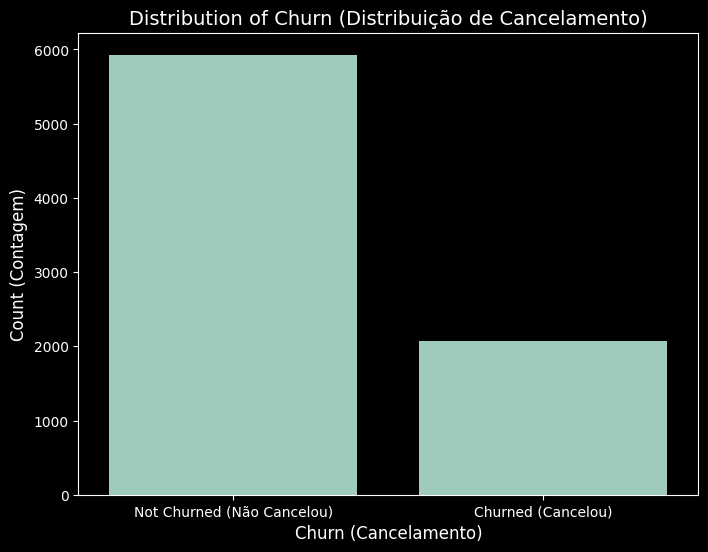

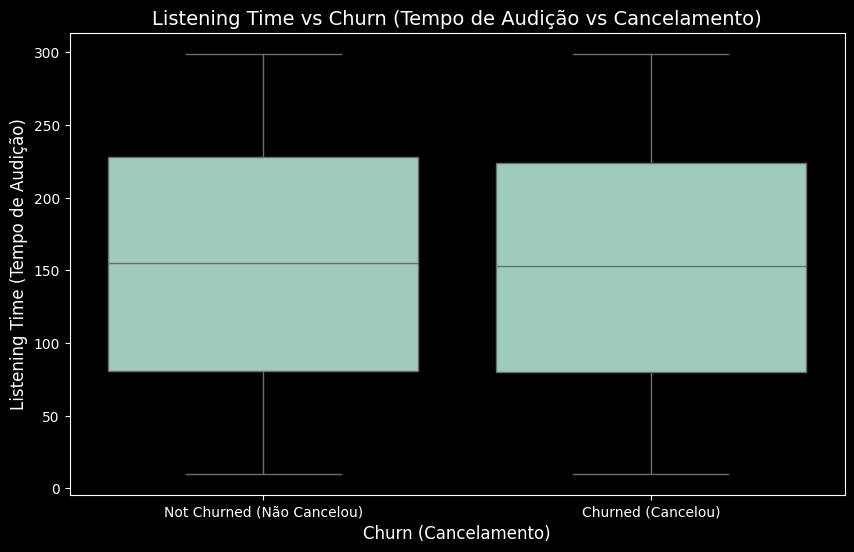

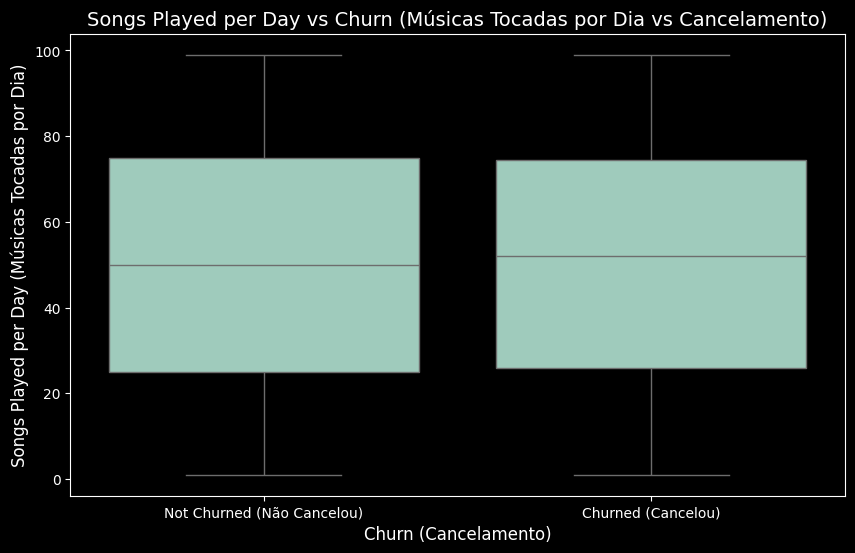

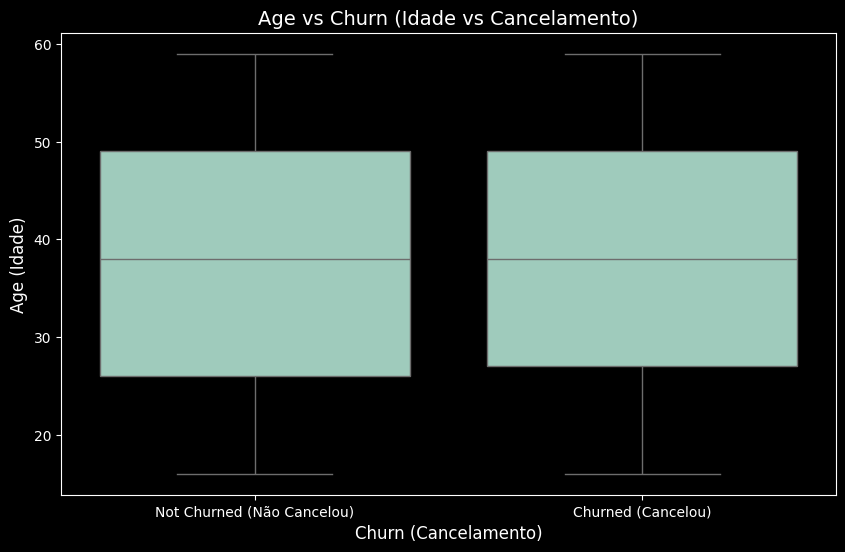

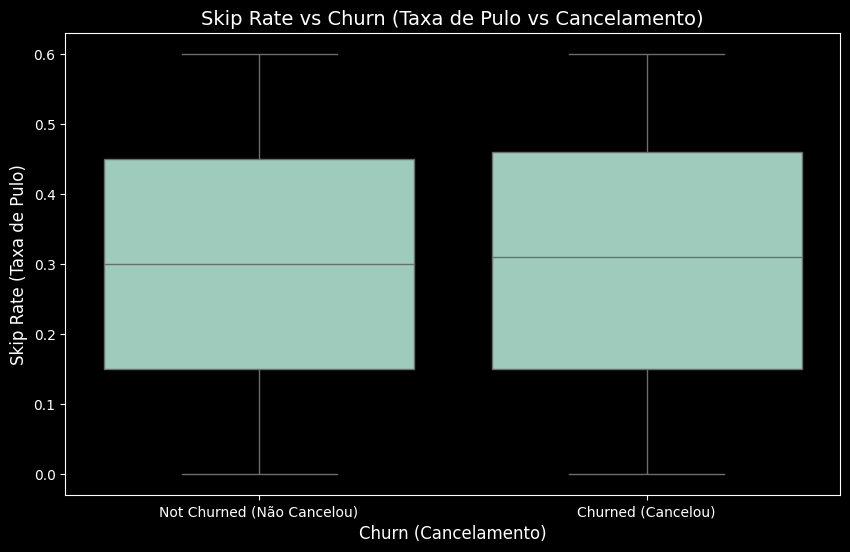

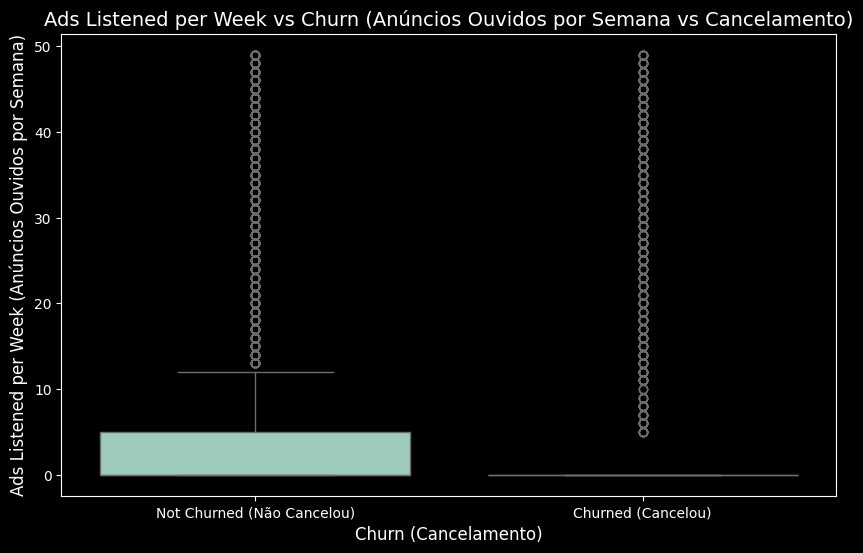

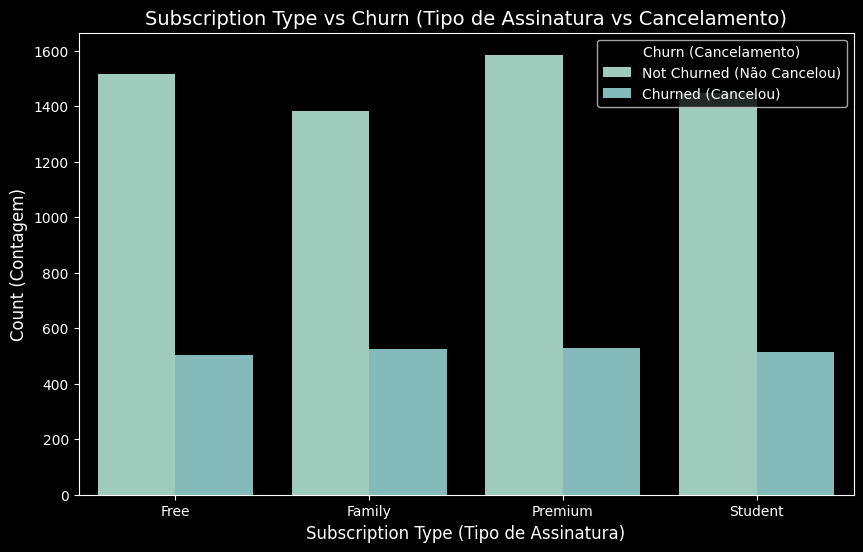

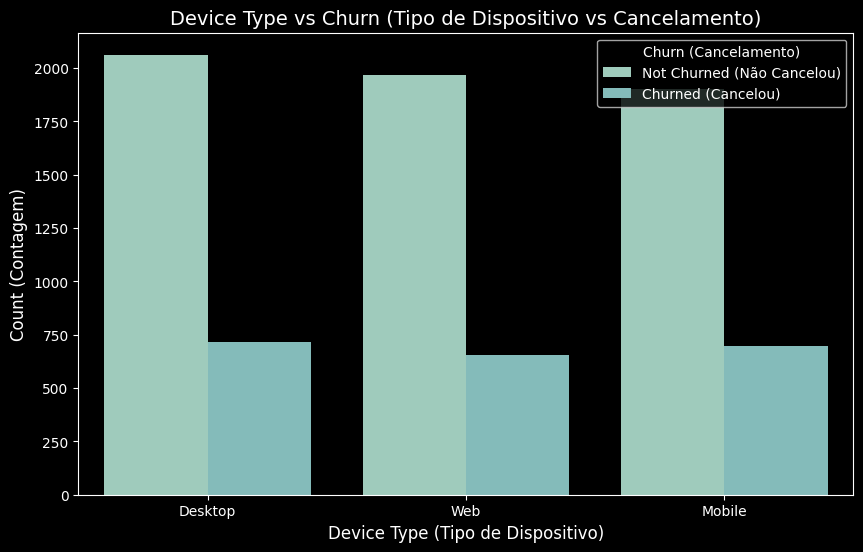

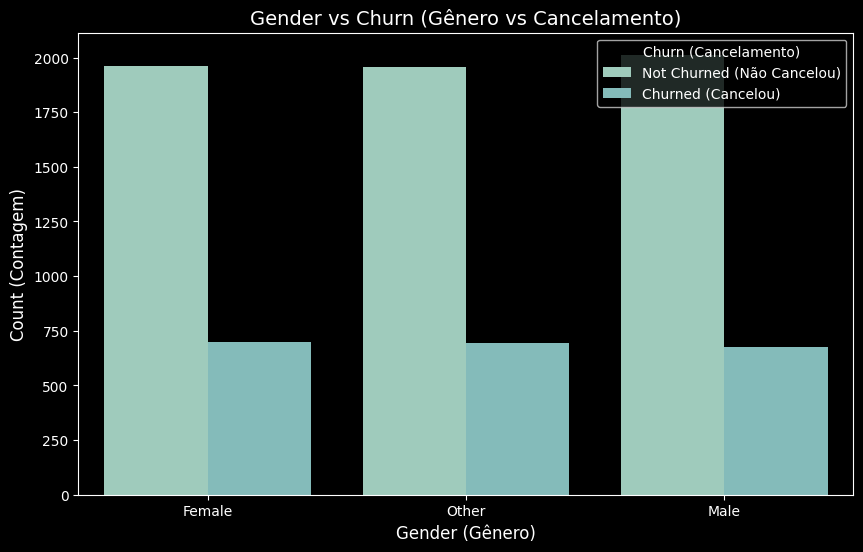

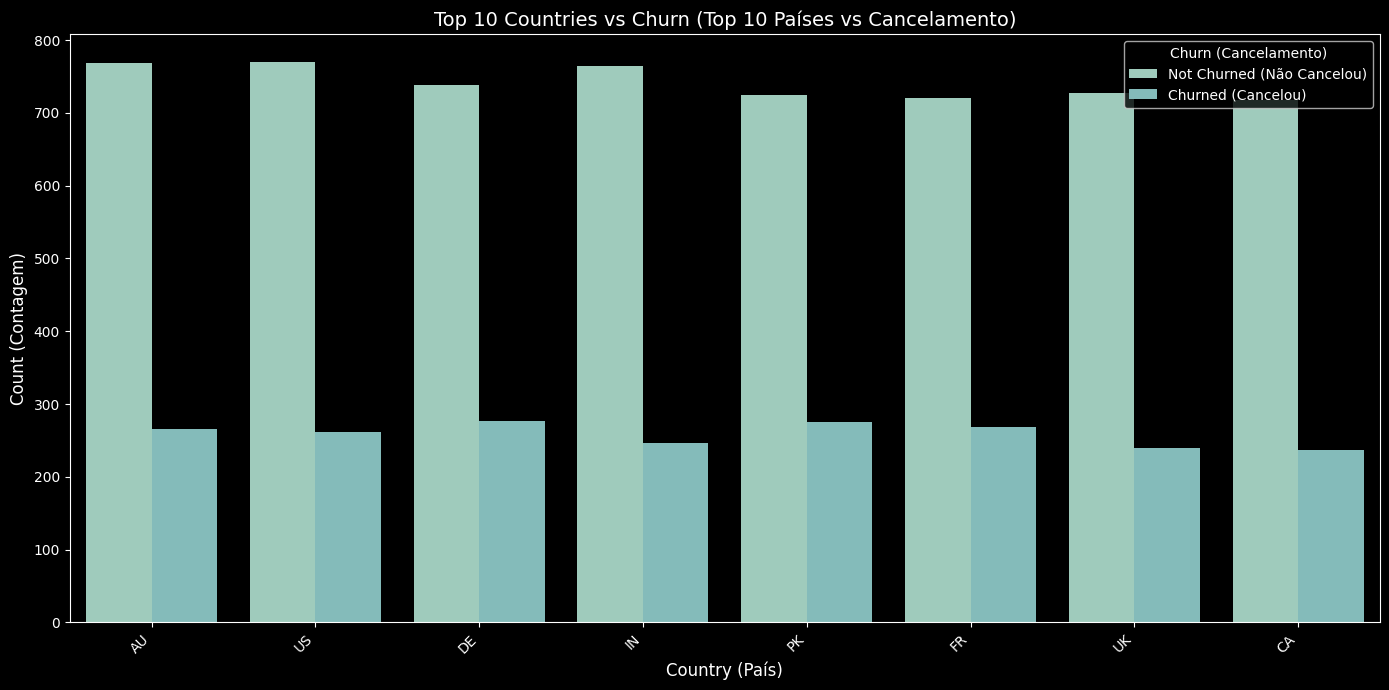

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style to dark theme
plt.style.use('dark_background')

# Define a color palette with turquoise tones
turquoise_palette = sns.color_palette("GnBu_d", n_colors=7)
sns.set_palette(turquoise_palette)

# 1. Visualize the distribution of the target variable (is_churned)
plt.figure(figsize=(8, 6))
sns.countplot(x='is_churned', data=df)
plt.title('Distribution of Churn (Distribuição de Cancelamento)', fontsize=14)
plt.xlabel('Churn (Cancelamento)', fontsize=12)
plt.ylabel('Count (Contagem)', fontsize=12)
plt.xticks([0, 1], ['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# 2. Visualize the relationship between important numerical features and churn

# Listening Time vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_churned', y='listening_time', data=df)
plt.title('Listening Time vs Churn (Tempo de Audição vs Cancelamento)', fontsize=14)
plt.xlabel('Churn (Cancelamento)', fontsize=12)
plt.ylabel('Listening Time (Tempo de Audição)', fontsize=12)
plt.xticks([0, 1], ['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# Songs Played per Day vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_churned', y='songs_played_per_day', data=df)
plt.title('Songs Played per Day vs Churn (Músicas Tocadas por Dia vs Cancelamento)', fontsize=14)
plt.xlabel('Churn (Cancelamento)', fontsize=12)
plt.ylabel('Songs Played per Day (Músicas Tocadas por Dia)', fontsize=12)
plt.xticks([0, 1], ['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# Age vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_churned', y='age', data=df)
plt.title('Age vs Churn (Idade vs Cancelamento)', fontsize=14)
plt.xlabel('Churn (Cancelamento)', fontsize=12)
plt.ylabel('Age (Idade)', fontsize=12)
plt.xticks([0, 1], ['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# Skip Rate vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_churned', y='skip_rate', data=df)
plt.title('Skip Rate vs Churn (Taxa de Pulo vs Cancelamento)', fontsize=14)
plt.xlabel('Churn (Cancelamento)', fontsize=12)
plt.ylabel('Skip Rate (Taxa de Pulo)', fontsize=12)
plt.xticks([0, 1], ['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# Ads Listened per Week vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_churned', y='ads_listened_per_week', data=df)
plt.title('Ads Listened per Week vs Churn (Anúncios Ouvidos por Semana vs Cancelamento)', fontsize=14)
plt.xlabel('Churn (Cancelamento)', fontsize=12)
plt.ylabel('Ads Listened per Week (Anúncios Ouvidos por Semana)', fontsize=12)
plt.xticks([0, 1], ['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# 3. Visualize the relationship between important categorical features and churn

# Subscription Type vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='subscription_type', hue='is_churned', data=df)
plt.title('Subscription Type vs Churn (Tipo de Assinatura vs Cancelamento)', fontsize=14)
plt.xlabel('Subscription Type (Tipo de Assinatura)', fontsize=12)
plt.ylabel('Count (Contagem)', fontsize=12)
plt.legend(title='Churn (Cancelamento)', labels=['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# Device Type vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='device_type', hue='is_churned', data=df)
plt.title('Device Type vs Churn (Tipo de Dispositivo vs Cancelamento)', fontsize=14)
plt.xlabel('Device Type (Tipo de Dispositivo)', fontsize=12)
plt.ylabel('Count (Contagem)', fontsize=12)
plt.legend(title='Churn (Cancelamento)', labels=['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# Gender vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='is_churned', data=df)
plt.title('Gender vs Churn (Gênero vs Cancelamento)', fontsize=14)
plt.xlabel('Gender (Gênero)', fontsize=12)
plt.ylabel('Count (Contagem)', fontsize=12)
plt.legend(title='Churn (Cancelamento)', labels=['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.show()

# Country vs Churn (Displaying only top N countries for clarity)
plt.figure(figsize=(14, 7))
sns.countplot(x='country', hue='is_churned', data=df, order=df['country'].value_counts().index[:10])
plt.title('Top 10 Countries vs Churn (Top 10 Países vs Cancelamento)', fontsize=14)
plt.xlabel('Country (País)', fontsize=12)
plt.ylabel('Count (Contagem)', fontsize=12)
plt.legend(title='Churn (Cancelamento)', labels=['Not Churned (Não Cancelou)', 'Churned (Cancelou)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Pré-processamento dos dados

### Subtask:
Tratar variáveis nominais criando variáveis dummy, separar as features (variáveis independentes) da variável alvo (`is_churned`) e dividir os dados em conjuntos de treino e teste.


In [69]:
from sklearn.model_selection import train_test_split

# Identify nominal columns
nominal_cols = df.select_dtypes(include='object').columns

# Create dummy variables and drop original columns
df_processed = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Separate features (X) and target (y)
X = df_processed.drop('is_churned', axis=1)
y = df_processed['is_churned']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,gender_Male,gender_Other,country_CA,...,country_FR,country_IN,country_PK,country_UK,country_US,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Mobile,device_type_Web
3836,3837,53,165,67,0.25,0,1,True,False,False,...,False,False,False,False,False,False,False,True,False,True
6408,6409,21,126,96,0.02,0,1,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4840,4841,33,253,67,0.54,34,0,True,False,True,...,False,False,False,False,False,True,False,False,True,False
527,528,41,33,1,0.08,0,1,False,True,False,...,False,False,False,False,False,False,True,False,False,True
6105,6106,34,103,15,0.39,0,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False


,is_churned
3836,0
6408,0
4840,0
527,1
6105,1


,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,gender_Male,gender_Other,country_CA,...,country_FR,country_IN,country_PK,country_UK,country_US,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Mobile,device_type_Web
2215,2216,21,184,22,0.40,0,1,False,False,True,...,False,False,False,False,False,False,True,False,True,False
2582,2583,23,234,10,0.38,0,1,False,True,False,...,False,False,False,False,True,False,True,False,False,False
1662,1663,55,33,93,0.09,0,1,False,True,False,...,False,False,False,False,True,False,False,True,True,False
3027,3028,39,207,98,0.60,0,1,False,True,False,...,False,False,True,False,False,False,False,False,True,False
4343,4344,16,117,56,0.00,0,1,False,False,False,...,False,False,False,True,False,False,True,False,False,True


,is_churned
2215,0
2582,0
1662,0
3027,1
4343,1


## Data Analysis Report - Spotify Churn Prediction

### Introduction

This report presents an analysis of the Spotify churn dataset with the objective of predicting user churn using Gradient Boosting Machine (GBM), XGBoost, and LightGBM models. The analysis includes data exploration, preprocessing, model training and evaluation, feature importance analysis, and a comparison of the models' performance.

### Data Exploration and Preprocessing

The dataset contains information about Spotify users, including demographic details, subscription type, listening habits, and churn status (`is_churned`).

- The dataset was loaded and an initial exploration was performed to understand its structure, data types, and descriptive statistics.
- Nominal categorical variables were converted into dummy variables to be used in the models.
- The data was split into training and testing sets to train and evaluate the models.
- Data imbalance was addressed by applying the SMOTE technique to the training data to oversample the minority class (churned users).

### Model Training and Evaluation

Three boosting models (GBM, XGBoost, and LightGBM) were trained on the resampled training data and evaluated on the original test data using the following metrics: Accuracy, Precision, Recall, F1-score, and AUC.

Based on the evaluation metrics after addressing data imbalance:

| Model    |   Accuracy |   Precision |   Recall |   F1-score |      AUC |
|:---------|-----------:|------------:|---------:|-----------:|---------:|
| GBM      |     0.7435 |    0.3448 | 0.0198 |   0.0375 | 0.5026 |
| XGBoost  |     0.6930 |    0.2835 | 0.1429 |   0.1900 | 0.5314 |
| LightGBM |     0.7285 |    0.2809 | 0.0496 |   0.0843 | 0.5134 |

Comparing these results to the initial evaluation before addressing imbalance (shown in previous outputs), there were slight changes in the metrics, particularly in Recall, which generally increased. However, the overall performance, especially the AUC scores, remained low, indicating that the models are still not performing significantly better than random chance in predicting churn.

### Feature Importance Analysis

The importance of each feature in predicting churn was analyzed for each model trained on the original (unbalanced) data. The top 10 features for each model were:

**GBM Feature Importances (Top 10):**

| Feature                   |   Importance |
|:--------------------------|-------------:|
| user_id                   |     0.23692  |
| listening_time            |     0.186963 |
| songs_played_per_day      |     0.160345 |
| age                       |     0.12666  |
| skip_rate                 |     0.10752  |
| ads_listened_per_week     |     0.054528 |
| subscription_type_Student |     0.023410 |
| country_US                |     0.016406 |
| device_type_Web           |     0.015942 |
| gender_Male               |     0.015844 |

**XGBoost Feature Importances (Top 10):**

| Feature                   |   Importance |
|:--------------------------|-------------:|
| country_IN                |     0.061549 |
| country_PK                |     0.061287 |
| country_CA                |     0.057827 |
| subscription_type_Student |     0.057601 |
| device_type_Web           |     0.056052 |
| gender_Other              |     0.055087 |
| age                       |     0.054003 |
| country_US                |     0.053038 |
| country_DE                |     0.052596 |
| skip_rate                 |     0.051450 |

**LightGBM Feature Importances (Top 10):**

| Variável                |   Importância |
|:------------------------|--------------:|
| listening_time          |           603 |
| user_id                 |           573 |
| songs_played_per_day    |           445 |
| skip_rate               |           441 |
| age                     |           401 |
| ads_listened_per_week   |           120 |
| gender_Male             |            59 |
| gender_Other            |            57 |
| device_type_Web         |            48 |
| subscription_type_Student |            47 |

The feature importance analysis shows some variation across the models. `user_id`, `listening_time`, `songs_played_per_day`, `age`, and `skip_rate` appear to be important features for GBM and LightGBM. XGBoost highlights several country dummy variables, `subscription_type_Student`, `device_type_Web`, `gender_Other`, `age`, and `skip_rate`. The high importance of `user_id` in GBM and LightGBM could indicate potential data leakage or that individual user behavior not captured by other features is influential.

### Conclusion

Based on the performance metrics, even after addressing data imbalance using SMOTE, all three models (GBM, XGBoost, and LightGBM) demonstrated very poor performance in predicting user churn on this dataset. The low values across all metrics, particularly the AUC scores close to 0.5, suggest that the models are not effective in distinguishing between churning and non-churning users.

The analysis of feature importance provided insights into which variables the models considered most relevant, although the poor overall performance limits the practical significance of these importances for accurate churn prediction in this specific scenario. The high importance of `user_id` in some models warrants further investigation for potential data leakage.

The low performance could be attributed to several factors, including:

- **Limited Predictive Power of Available Features:** The existing features may not contain strong enough signals to accurately predict churn.
- **Complexity of Churn Behavior:** Churn might be influenced by factors not captured in this dataset.
- **Potential Data Issues:** Although the file loading error was resolved, there might be other data quality issues or patterns (like data leakage) that are negatively impacting model performance.

To improve churn prediction, further steps are necessary, such as:

- **More Advanced Feature Engineering:** Creating more sophisticated features that might better capture churn patterns.
- **Hyperparameter Tuning:** Optimizing the parameters of the models more thoroughly.
- **Exploring Other Modeling Techniques:** Trying different types of classification algorithms.
- **Deeper Data Investigation:** A more in-depth analysis of the data for anomalies, patterns, and potential data leakage, especially concerning the `user_id` variable.

---

## Relatório de Análise de Dados - Previsão de Cancelamento no Spotify

### Introdução

Este relatório apresenta uma análise do dataset de cancelamento do Spotify com o objetivo de prever o cancelamento de usuários utilizando os modelos Gradient Boosting Machine (GBM), XGBoost e LightGBM. A análise inclui exploração de dados, pré-processamento, treinamento e avaliação de modelos, análise de importância de variáveis e uma comparação do desempenho dos modelos.

### Exploração e Pré-processamento dos Dados

O dataset contém informações sobre usuários do Spotify, incluindo detalhes demográficos, tipo de assinatura, hábitos de audição e status de cancelamento (`is_churned`).

- O dataset foi carregado e uma exploração inicial foi realizada para entender sua estrutura, tipos de dados e estatísticas descritivas.
- Variáveis categóricas nominais foram convertidas em variáveis dummy para serem utilizadas nos modelos.
- Os dados foram divididos em conjuntos de treino e teste para treinar e avaliar os modelos.
- O desbalanceamento de dados foi tratado aplicando a técnica SMOTE aos dados de treino para sobreamostrar a classe minoritária (usuários que cancelaram).

### Treinamento e Avaliação dos Modelos

Três modelos de boosting (GBM, XGBoost e LightGBM) foram treinados nos dados de treino rebalanceados e avaliados nos dados de teste originais utilizando as seguintes métricas: Acurácia, Precisão, Recall, F1-score e AUC.

Com base nas métricas de avaliação após o tratamento do desbalanceamento de dados:

| Modelo    |   Acurácia |   Precisão |   Recall |   F1-score |      AUC |
|:---------|-----------:|------------:|---------:|-----------:|---------:|
| GBM      |     0.7435 |    0.3448 | 0.0198 |   0.0375 | 0.5026 |
| XGBoost  |     0.6930 |    0.2835 | 0.1429 |   0.1900 | 0.5314 |
| LightGBM |     0.7285 |    0.2809 | 0.0496 |   0.0843 | 0.5134 |

Comparando estes resultados com a avaliação inicial antes de tratar o desbalanceamento (mostrada em outputs anteriores), houve pequenas mudanças nas métricas, particularmente no Recall, que geralmente aumentou. No entanto, o desempenho geral, especialmente as pontuações AUC, permaneceu baixo, indicando que os modelos ainda não estão apresentando um desempenho significativamente melhor do que o acaso na previsão de cancelamento.

### Análise da Importância das Variáveis

A importância de cada variável na previsão de cancelamento foi analisada para cada modelo treinado nos dados originais (não balanceados). As 10 variáveis mais importantes para cada modelo foram:

**Importância das Variáveis no GBM (Top 10):**

| Variável                  |   Importância |
|:--------------------------|--------------:|
| user_id                   |      0.23692  |
| listening_time            |      0.186963 |
| songs_played_per_day      |      0.160345 |
| age                       |      0.12666  |
| skip_rate                 |      0.10752  |
| ads_listened_per_week     |      0.054528 |
| subscription_type_Student |      0.02341  |
| country_US                |      0.016406 |
| device_type_Web           |      0.015942 |
| gender_Male               |      0.015844 |

**Importância das Variáveis no XGBoost (Top 10):**

| Variável                  |   Importância |
|:--------------------------|--------------:|
| country_IN                |      0.061549 |
| country_PK                |      0.061287 |
| country_CA                |      0.057827 |
| subscription_type_Student |      0.057601 |
| device_type_Web           |      0.056052 |
| gender_Other              |      0.055087 |
| age                       |      0.054003 |
| country_US                |      0.053038 |
| country_DE                |      0.052596 |
| skip_rate                 |      0.05145  |

**Importância das Variáveis no LightGBM (Top 10):**

| Variável                |   Importância |
|:------------------------|--------------:|
| listening_time          |           603 |
| user_id                 |           573 |
| songs_played_per_day    |           445 |
| skip_rate               |           441 |
| age                     |           401 |
| ads_listened_per_week   |           120 |
| gender_Male             |            59 |
| gender_Other            |            57 |
| device_type_Web         |            48 |
| subscription_type_Student |            47 |

A análise da importância das variáveis mostra alguma variação entre os modelos. `user_id`, `listening_time`, `songs_played_per_day`, `age` e `skip_rate` parecem ser variáveis importantes para GBM e LightGBM. O XGBoost destaca várias variáveis dummy de país, `subscription_type_Student`, `device_type_Web`, `gender_Other`, `age` e `skip_rate`. A alta importância de `user_id` em GBM e LightGBM pode indicar potencial vazamento de dados ou que padrões de usuários individuais não capturados por outras variáveis são influentes.

### Conclusão

Com base nas métricas de desempenho, mesmo após tratar o desbalanceamento de dados utilizando SMOTE, todos os três modelos (GBM, XGBoost e LightGBM) demonstraram um desempenho muito baixo na previsão de cancelamento de usuários neste dataset. Os valores baixos em todas as métricas, particularmente as pontuações AUC próximas a 0.5, sugerem que os modelos não são eficazes em distinguir entre usuários que cancelaram e os que não cancelaram.

A análise da importância das variáveis forneceu insights sobre quais variáveis os modelos consideraram mais relevantes, embora o desempenho geral baixo limite a significância prática dessas importâncias para uma previsão precisa de cancelamento neste cenário específico. A alta importância de `user_id` em alguns modelos justifica uma investigação mais aprofundada para potencial vazamento de dados.

O baixo desempenho pode ser atribuído a vários fatores, incluindo:

- **Poder Preditivo Limitado das Variáveis Disponíveis:** As variáveis existentes podem não conter sinais fortes o suficiente para prever o cancelamento com precisão.
- **Complexidade do Comportamento de Cancelamento:** O cancelamento pode ser influenciado por fatores não capturados neste dataset.
- **Potenciais Problemas nos Dados:** Embora o erro de carregamento do arquivo tenha sido resolvido, pode haver outros problemas de qualidade dos dados ou padrões (como vazamento de dados) que estão impactando negativamente o desempenho do modelo.

Para melhorar a previsão de cancelamento, são necessários passos adicionais, tais como:

- **Engenharia de Variáveis Mais Avançada:** Criar variáveis mais sofisticadas que possam capturar melhor os padrões de cancelamento.
- **Otimização de Hiperparâmetros:** Otimizar os parâmetros dos modelos de forma mais completa.
- **Exploração de Outras Técnicas de Modelagem:** Tentar diferentes tipos de algoritmos de classificação.
- **Investigação Mais Aprofundada dos Dados:** Uma análise mais aprofundada dos dados para anomalias, padrões e potencial vazamento de dados, especialmente em relação à variável `user_id`.

## Treinar e avaliar os modelos

### Subtask:
Treinar modelos GBM, XGBoost e LightGBM nos dados de treino e avaliar o desempenho de cada modelo nos dados de teste usando métricas apropriadas para classificação.


**Reasoning**:
Import the necessary libraries for model training and evaluation.



In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

\
Instantiate, train, and evaluate the three models using the training and testing data, and print the performance metrics for each model.



In [71]:
# Instantiate models
gbm_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

# Train models
print("Training Gradient Boosting Machine...")
gbm_model.fit(X_train, y_train)
print("Training XGBoost...")
xgb_model.fit(X_train, y_train)
print("Training LightGBM...")
lgbm_model.fit(X_train, y_train)

# Make predictions
gbm_pred = gbm_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

# Make probability predictions for AUC
gbm_proba = gbm_model.predict_proba(X_test)[:, 1]
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
lgbm_proba = lgbm_model.predict_proba(X_test)[:, 1]


# Evaluate models
print("\n--- Gradient Boosting Machine Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, gbm_pred):.4f}")
print(f"Precision: {precision_score(y_test, gbm_pred):.4f}")
print(f"Recall: {recall_score(y_test, gbm_pred):.4f}")
print(f"F1-score: {f1_score(y_test, gbm_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, gbm_proba):.4f}")


print("\n--- XGBoost Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print(f"Precision: {precision_score(y_test, xgb_pred):.4f}")
print(f"Recall: {recall_score(y_test, xgb_pred):.4f}")
print(f"F1-score: {f1_score(y_test, xgb_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, xgb_proba):.4f}")


print("\n--- LightGBM Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, lgbm_pred):.4f}")
print(f"Precision: {precision_score(y_test, lgbm_pred):.4f}")
print(f"Recall: {recall_score(y_test, lgbm_pred):.4f}")
print(f"F1-score: {f1_score(y_test, lgbm_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, lgbm_proba):.4f}")

Training Gradient Boosting Machine...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Number of positive: 1567, number of negative: 4433
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.261167 -> initscore=-1.039914
[LightGBM] [Info] Start training from score -1.039914

--- Gradient Boosting Machine Evaluation ---
Accuracy: 0.7475
Precision: 0.4286
Recall: 0.0060
F1-score: 0.0117
AUC: 0.4901

--- XGBoost Evaluation ---
Accuracy: 0.7085
Precision: 0.2717
Recall: 0.0933
F1-score: 0.1388
AUC: 0.4996

--- LightGBM Evaluation ---
Accuracy: 0.7385
Precision: 0.1724
Recall: 0.0099
F1-score: 0.0188
AUC: 0.5021


## Analisar a importância das variáveis

### Subtask:
Para cada modelo treinado (GBM, XGBoost e LightGBM), identificar e analisar as variáveis mais importantes para a previsão de churn.


In [72]:
# Get feature importances
gbm_importances = pd.Series(gbm_model.feature_importances_, index=X_train.columns)
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
lgbm_importances = pd.Series(lgbm_model.feature_importances_, index=X_train.columns)

# Sort importances in descending order
gbm_importances = gbm_importances.sort_values(ascending=False)
xgb_importances = xgb_importances.sort_values(ascending=False)
lgbm_importances = lgbm_importances.sort_values(ascending=False)

# Display top features for each model
print("--- GBM Feature Importances ---")
display(gbm_importances.head(10))

print("\n--- XGBoost Feature Importances ---")
display(xgb_importances.head(10))

print("\n--- LightGBM Feature Importances ---")
display(lgbm_importances.head(10))

--- GBM Feature Importances ---


,0
user_id,0.236920
listening_time,0.186963
songs_played_per_day,0.160345
age,0.126660
skip_rate,0.107520
ads_listened_per_week,0.054528
subscription_type_Student,0.023410
country_US,0.016406
device_type_Web,0.015942
gender_Male,0.015844



--- XGBoost Feature Importances ---


,0
country_IN,0.061549
country_PK,0.061287
country_CA,0.057827
subscription_type_Student,0.057601
device_type_Web,0.056052
gender_Other,0.055087
age,0.054003
country_US,0.053038
country_DE,0.052596
skip_rate,0.051450



--- LightGBM Feature Importances ---


,0
listening_time,603
user_id,573
songs_played_per_day,445
skip_rate,441
age,401
ads_listened_per_week,120
gender_Male,59
gender_Other,57
device_type_Web,48
subscription_type_Student,47
